Avacado Project
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [101]:
import numpy as np                                                
import pandas as pd                                            
import matplotlib.pyplot as plt                                   
import seaborn as sns                                            
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from subprocess import check_output
from sklearn import metrics

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/ASUS/Desktop/PROJECT/csv files/Data-Science-ML-Capstone-Projects-master/Data-Science-ML-Capstone-Projects-master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df = df.drop('Date',axis=1)

In [5]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [6]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [7]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.shape

(16468, 12)

In [9]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [10]:
df.isnull().sum()

AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [11]:
#total no of rows data present
16468-14951

1517

In [12]:
#all the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

type: ['conventional' nan]
conventional    1517
Name: type, dtype: int64


region: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico' nan]
California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
C

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


df['AveragePrice'].replace(np.NaN,df['AveragePrice'].median,inplace=True)
df['Total Volume'].replace(np.NaN,df['Total Volume'].median,inplace=True)
df['4046'].replace(np.NaN,df['4046'].median,inplace=True)
df['4225'].replace(np.NaN,df['4225'].median,inplace=True)
df['4770'].replace(np.NaN,df['4770'].median,inplace=True)
df['Total Bags'].replace(np.NaN,df['Total Bags'].median,inplace=True)
df['Small Bags'].replace(np.NaN,df['Small Bags'].median,inplace=True)
df['Large Bags'].replace(np.NaN,df['Large Bags'].median,inplace=True)
df['XLarge Bags'].replace(np.NaN,df['XLarge Bags'].median,inplace=True)
df['type'].replace(np.NaN,df['type'].mode,inplace=True)
df['year'].replace(np.NaN,df['year'].mode,inplace=True)
df['region'].replace(np.NaN,df['region'].mode,inplace=True)

In [14]:
df=df.dropna()

In [15]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [16]:
df.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte


In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [18]:
df.type.unique()

array(['conventional'], dtype=object)

In [19]:
df = df.drop('type',axis=1)

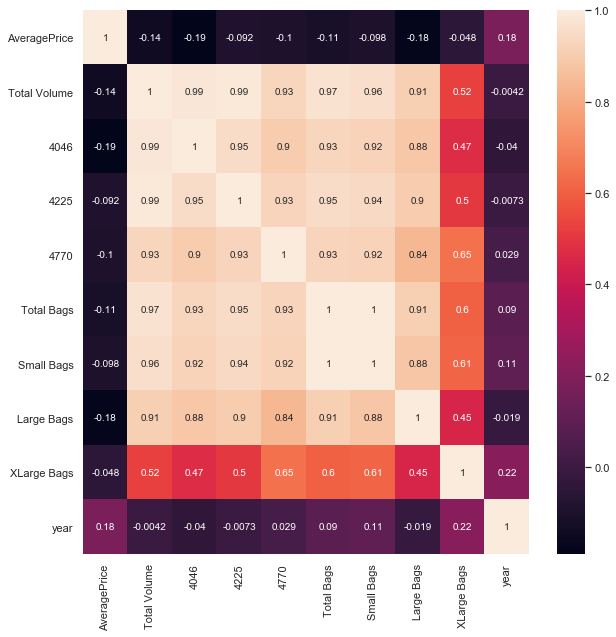

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
#Label Encoding "region" column to convert into categorical data to numerical data.

In [22]:
#label encode region

le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0


In [23]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [27]:
#Distribution of average price

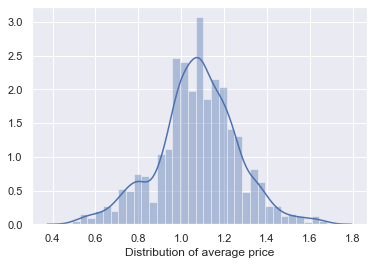

In [24]:
sns.distplot(df["AveragePrice"],axlabel="Distribution of average price")

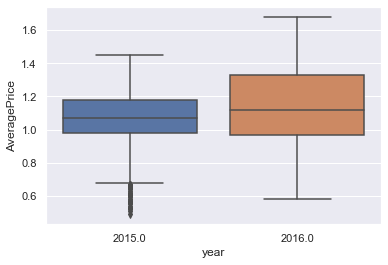

In [25]:
sns.boxplot(x="year", y="AveragePrice", data=df)

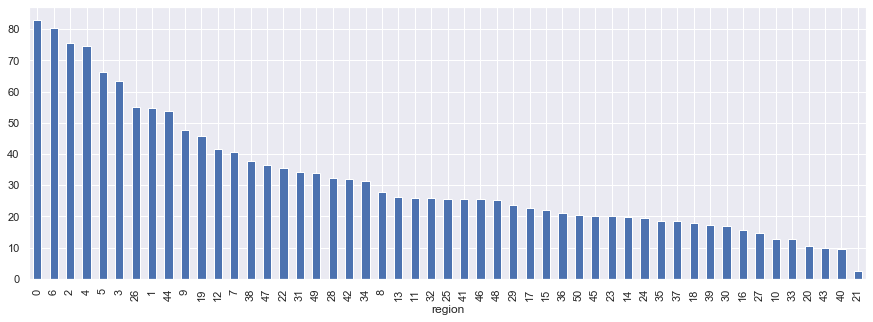

In [26]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

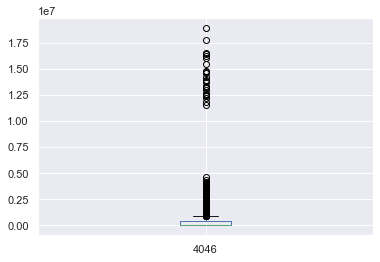

In [31]:
df['4046'].plot.box() 

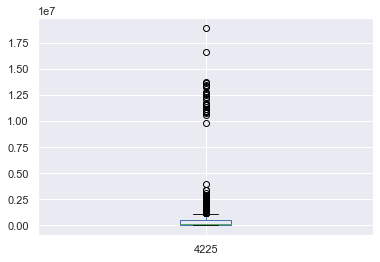

In [32]:
df['4225'].plot.box() 

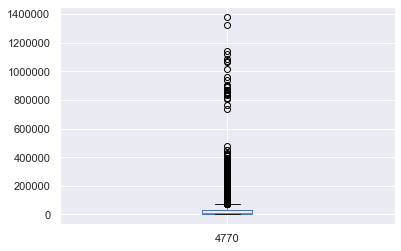

In [33]:
df['4770'].plot.box() 

In [38]:
#Bivariant analysis

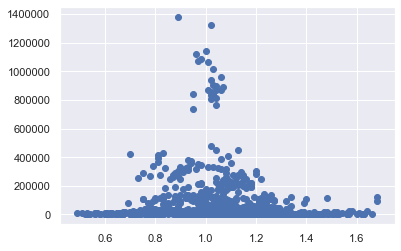

In [35]:
plt.scatter(df['AveragePrice'],df['4770'])

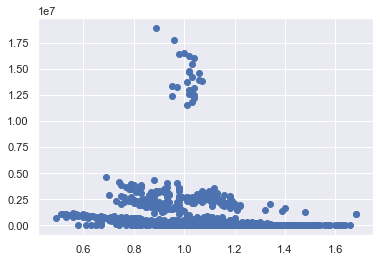

In [37]:
plt.scatter(df['AveragePrice'],df['4046'])

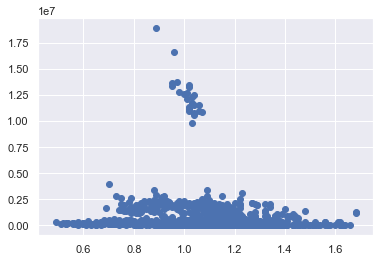

In [36]:
plt.scatter(df['AveragePrice'],df['4225'])

In [40]:
# Removing outliers

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [1.45639674, 0.34907791, 0.33167633, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       [0.76783831, 0.33478463, 0.33161448, ..., 0.29272731, 0.44100815,
        1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.1820374 , 2.26753179,
        0.88028586],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.29272731, 2.26753179,
        0.88028586],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.29272731, 2.26753179,
        0.88028586]])

In [41]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [42]:
df_new=df[(z<3).all(axis=1)]

In [43]:
df_new

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015.0,0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015.0,0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015.0,0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015.0,0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015.0,0


In [44]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

In [45]:
#Seperating independent and target variable into x and y

In [47]:
y = df_new.AveragePrice
x = df_new.drop('AveragePrice',axis=1)

In [49]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0


In [50]:
# In some columns, skewness is present. so, we are removing it by power transformation

In [51]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [52]:
df_new.skew()
x=df_new

In [53]:
# See, here all the skewness have been removed
x.skew()

Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
year            2.004439
region         -0.219708
dtype: float64

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=43)

In [55]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
x_train

array([[ 0.        ,  0.10707353, -1.70170361, ..., -0.83900909,
        -0.42049374,  0.13448329],
       [ 0.        ,  1.27515599,  0.48678604, ...,  1.23153161,
        -0.42049374,  0.74200588],
       [ 0.        ,  1.91136054,  1.8908348 , ...,  0.77621116,
        -0.42049374,  1.19466153],
       ...,
       [ 0.        ,  0.08320567, -1.09665502, ...,  1.44418189,
        -0.42049374, -0.55789943],
       [ 0.        , -0.06682627, -0.85340662, ...,  1.53317011,
        -0.42049374, -0.55789943],
       [ 0.        , -1.04911275,  0.93504946, ...,  1.10149682,
         2.37815667, -1.06584121]])

In [57]:
#LinearRegression

In [61]:
linreg1 = LinearRegression()
linreg1.fit(x_train, y_train) 

coef = linreg1.coef_.tolist()
coef.insert(0, linreg1.intercept_)
eq1 = zip(df, coef)

for c1,c2 in eq1:
    print(c1,c2)

y_pred_train = linreg1.predict(x_train)
y_pred_test = linreg1.predict(x_test)

AveragePrice 1.0785771144278604
Total Volume 0.0
4046 -0.1268691709568687
4225 -0.027387042139584577
4770 -0.018388851777912614
Total Bags -0.20206960891189427
Small Bags 0.2426282454300708
Large Bags 0.048822892533852254
XLarge Bags 0.009146436588874087
year -0.002832888353712111
region -0.0008995491266803229


In [ ]:
#Model Evaluation

In [71]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [72]:
lm.score(x_train,y_train)

0.37787100630431225

In [73]:
lmpred=lm.predict(x_test)
lmpred

array([0.88044583, 1.00081542, 1.22232689, 0.92515033, 0.95133736,
       1.07689157, 1.07811284, 1.06495707, 0.96911071, 1.16967128,
       1.20899252, 1.1824787 , 0.97641646, 0.89879906, 0.97401744,
       0.93351101, 1.26200052, 0.96172965, 1.02790511, 1.07642357,
       1.2082416 , 0.94385808, 0.94488017, 0.990228  , 0.95775219,
       1.21508543, 1.0249918 , 1.0993107 , 1.07822687, 1.13713436,
       1.08950341, 0.9616196 , 1.20206182, 1.0126718 , 1.14359542,
       0.96715762, 1.2630715 , 1.04366819, 1.04547955, 1.05486294,
       1.19468526, 1.33622304, 0.9777765 , 1.23200265, 1.19483342,
       1.12406167, 1.19271768, 1.04583777, 1.05693195, 0.96434267,
       1.01364698, 1.04883428, 1.14811728, 1.20123068, 0.9533677 ,
       0.9773685 , 1.1146457 , 1.06300963, 1.06102959, 1.30792615,
       1.09894862, 0.97560772, 0.938165  , 1.06980428, 1.13558278,
       0.94854507, 1.0647048 , 1.10938835, 0.913134  , 0.85942686,
       1.0332744 , 1.25260878, 1.04561836, 1.20271257, 0.93835

In [74]:
lm.score(x_test,y_test)

0.3067764375637546

In [75]:
lm.coef_

array([ 0.        , -0.12686917, -0.02738704, -0.01838885, -0.20206961,
        0.24262825,  0.04882289,  0.00914644, -0.00283289, -0.00089955])

In [78]:
print("MSE=",mean_squared_error(y_test,lmpred))

print("R2 score=",r2_score(y_test,lmpred))

MSE= 0.023893652285585296
R2 score= 0.3067764375637546


In [80]:
#lasso and Ridge

In [81]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [82]:
alpha = lasscv.alpha_
alpha

3.343352473251025e-06

In [83]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.343352473251025e-06)

In [84]:
lasso_mod=lasso_reg.score(x_test,y_test)
lasso_mod*100

30.68251899553506

In [85]:
#RandomForest

In [93]:
rfr = RandomForestRegressor(n_estimators=100,criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,random_state = 43)
rfr.fit(x_train, y_train) 

RandomForestRegressor(random_state=43)

In [89]:
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)

In [90]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train),' and RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.030915509640282574  and RMSE for test set is 0.07767505922743854


In [110]:
#Tuning three hyperparameters now, by passing the diffrent values for both parameters

grid_param = {
    "n_estimators" : [90,100],
    'criterion' : ['entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split' : [4,5,6,7],
    'max_features' : ['auto','rondom']
}

In [111]:
grid_search = GridSearchCV(estimator=rfr,param_grid=grid_param,cv=5,n_jobs=-1,verbose=3)

In [112]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=43)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
forest = RandomForestClassifier(criterion = 'entropy',
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 4,
 n_estimators= 115)

In [ ]:
rfrfit(X_train,y_train)

In [ ]:
rfr.score(X_test,y_test)

In [92]:
# Saving the model

In [ ]:
import joblib
joblib.dump(lasso_mod,"FinalModel.pk1")